Please see the Utils file for the inner workings of this algorithm. This script will take a list of intial players (and the bench) and suggest a transfer and captain option each week. We would have liked to add the intuition for making extra transfers, but unfortunately ran out of time. You must run Initialisation.ipynb first as there are a few variables which have to be transferred to this script.

In [72]:
import Utils
import pandas as pd

import numpy as np
from collections import Counter
import math
import matplotlib.pyplot as plt

In [73]:
orig_data = pd.read_csv('all_with_history.csv')

C:\Users\Tasha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Model A: Optimised Bench

There were lots of ways to go about doing this, but as I don't particularly trust the model predictions, I decided to select the transfer with the largest error as it suggests they are performing far better than usual.

In [74]:
overall = pd.read_csv('all_predictions.csv')
overall = Utils.get_rolling_points_avg(overall) #gets error so we can use to check overperformance

In [75]:
%store -r bench_dict1 #import variables from init script
%store -r old_team1

no stored variable or alias #import
no stored variable or alias variables
no stored variable or alias from
no stored variable or alias init
no stored variable or alias script


In [76]:
bench_dict1

{'GK': 'alex_mccarthy',
 'FWD': 'dominic_calvert_lewin',
 'MID': 'yves_bissouma',
 'DEF': 'ezri_konsa_ngoyo'}

In [77]:
#get team before any subs
x11_all_opt = overall[(overall.full_name.isin(old_team1)) & (overall.GW == 1)][['full_name', 'player_team_name','position','value','predicted','actual']]
x11_all_opt = x11_all_opt.rename(columns = {'full_name': 'Name', 'player_team_name': 'Team', 'position': 'Position', 'value': 'Value',
                          'predicted': 'Predicted Points', 'actual': 'Actual Points'})

In [78]:
#get bench
bench_all_opt = overall[(overall.full_name.isin(list(bench_dict1.values()))) & (overall.GW == 1)][['full_name', 'player_team_name','position','value','predicted','actual']]
bench_all_opt = bench_all_opt.rename(columns = {'full_name': 'Name', 'player_team_name': 'Team', 'position': 'Position', 'value': 'Value',
                          'predicted': 'Predicted Points', 'actual': 'Actual Points'})

In [79]:
#combine bench and x11
x15_all_opt = pd.concat([x11_all_opt, bench_all_opt])

In [84]:
#transfer out the underachievers
players_in, players_out, teams1 = Utils.transfer_algorithm(overall, x11_all_opt, x15_all_opt)

harry_kane 125
michail_antonio 49
michael_keane 99
raphaël_varane 44
rúben_diogo_da_silva_neves 99
conor_gallagher 44
patrick_bamford 123
odsonne_edouard 58
james_tarkowski 108
joão_pedro_cavaco_cancelo 48
stuart_dallas 102
andros_townsend 47
bruno_miguel_borges_fernandes 166
mohamed_salah 39
vicente_guaita 84
edouard_mendy 23
raphaël_varane 78
reece_james 22
tyrone_mings 72
trevoh_chalobah 23
heung_min_son 124
maxwel_cornet 63
lewis_dunk 113
trent_alexander_arnold 34
odsonne_edouard 99
emmanuel_dennis 46
michail_antonio 124
joshua_king 67
edouard_mendy 129
aaron_ramsdale 79
andros_townsend 133
mason_mount 57
trevoh_chalobah 104
takehiro_tomiyasu 57
aaron_ramsdale 107
hugo_lloris 53
hugo_lloris 107
ederson_santana_de_moraes 47
ederson_santana_de_moraes 107
aaron_ramsdale 56
joshua_king 113
armando_broja 60
mason_mount 136
philippe_coutinho_correia 66
armando_broja 118
odsonne_edouard 53
odsonne_edouard 118
armando_broja 65
maxwel_cornet 124
dejan_kulusevski 64
dejan_kulusevski 124
jarr

In [85]:
%store teams1

Stored 'teams1' (list)


In [86]:
#set up df for the transfers for easy viewing
all_opt_df = Utils.create_output_table(overall, players_in, players_out, teams)

In [87]:
all_opt_df# .total_points.sum() + all_opt_df.cap_points.sum()

,GW,transferred_in,transferred_out,out_points,in_points
0,1,None,None,0,None
1,2,michail_antonio,harry_kane,0,16
2,3,raphaël_varane,michael_keane,6,12
3,4,conor_gallagher,rúben_diogo_da_silva_neves,3,8
4,5,odsonne_edouard,patrick_bamford,5,1
5,6,joão_pedro_cavaco_cancelo,james_tarkowski,0,12
6,7,andros_townsend,stuart_dallas,3,10
7,8,mohamed_salah,bruno_miguel_borges_fernandes,5,13
8,9,edouard_mendy,vicente_guaita,2,6
9,10,reece_james,raphaël_varane,6,21


In [88]:
#old function wasnt working, didnt have time to fix so will redo here#
#see transfer algorithm in Utils.py, i commented out the things that were broken
def calc_captain_and_points(x15, teamlist, original_data, overall, benchdict):
    gw_points = {}
    captain_decisions = {}
    captain_pnts = {}

    for i in np.arange(1,39): #from gw 1 to 38
        if i == 1: #gw 1 is special case
            df = x15
            old, subbed_team = Utils.make_subs(df, original_data, 1, benchdict) #get new team list and make the neccessary subs
            gw_points[i] = overall[overall.full_name.isin(subbed_team) & (overall.GW == 1)]['total_points'].sum() #calc points after subs
            #calculate best predicted performer and make them captain
            captain = [i for i in overall[overall.full_name.isin(subbed_team) & (overall.GW == 1)].sort_values('predicted').tail(1)['full_name']][0]
            captain_points = overall[(overall.full_name == captain) & (overall.GW == 1)]['total_points'].sum()
            captain_decisions[captain] = captain
            captain_pnts[i] = captain_points
        else:
            #get from updated team list
            df = overall[overall.full_name.isin(teamlist[i-2]) & (overall.GW == i)][['full_name', 'player_team_name','position',
                                                                             'value','predicted','actual']]
            df = df.rename(columns = {'full_name': 'Name', 'player_team_name': 'Team', 'position': 'Position', 'value': 'Value',
                          'predicted': 'Predicted Points', 'actual': 'Actual Points'})
        
            old, subbed_team = Utils.make_subs(df, original_data, i, benchdict)
            gw_points[i] = overall[overall.full_name.isin(subbed_team) & (overall.GW == i)]['total_points'].sum()    
            #get historical overachievement
            captain = [i for i in overall[overall.full_name.isin(subbed_team) & (overall.GW == i-1)].sort_values('avg_error').tail(1)['full_name']][0]
            captain_points = overall[(overall.full_name == captain) & (overall.GW == i)]['total_points'].sum()
            captain_decisions[i] = captain
            captain_pnts[i] = captain_points
            
    return gw_points, captain_decisions, captain_pnts


In [89]:
gw_points, captain_decisions, captain_pnts =calc_captain_and_points(x15_all_opt, teams, orig_data, overall, bench_dict1)

In [90]:
all_opt_df['points'] = gw_points.values()
all_opt_df['captain'] = captain_decisions.values()
all_opt_df['captain_points'] = captain_pnts.values()
all_opt_df['total_points'] = all_opt_df.points + all_opt_df.captain_points

In [91]:
all_opt_df = all_opt_df[['GW','transferred_in','transferred_out','out_points', 'in_points','captain','captain_points','total_points']]

In [92]:
all_opt_df

,GW,transferred_in,transferred_out,out_points,in_points,captain,captain_points,total_points
0,1,None,None,0,None,bruno_miguel_borges_fernandes,20,78
1,2,michail_antonio,harry_kane,0,16,bruno_miguel_borges_fernandes,1,61
2,3,raphaël_varane,michael_keane,6,12,michail_antonio,11,70
3,4,conor_gallagher,rúben_diogo_da_silva_neves,3,8,michail_antonio,-1,35
4,5,odsonne_edouard,patrick_bamford,5,1,odsonne_edouard,1,25
5,6,joão_pedro_cavaco_cancelo,james_tarkowski,0,12,odsonne_edouard,2,51
6,7,andros_townsend,stuart_dallas,3,10,michail_antonio,2,46
7,8,mohamed_salah,bruno_miguel_borges_fernandes,5,13,mohamed_salah,13,64
8,9,edouard_mendy,vicente_guaita,2,6,mohamed_salah,24,70
9,10,reece_james,raphaël_varane,6,21,mohamed_salah,5,61


In [93]:
all_opt_df.in_points[1:].sum() - all_opt_df.out_points[1:].sum()

120

In [94]:
all_opt_df.total_points.sum()

1868

# Model A: With Cheapest Bench

In [95]:
%store -r bench_dict2
%store -r old_team2

In [115]:
x11_all_cheap = overall[(overall.full_name.isin(old_team2)) & (overall.GW == 1)][['full_name', 'player_team_name','position','value','predicted','actual']]
x11_all_cheap = x11_all_cheap.rename(columns = {'full_name': 'Name', 'player_team_name': 'Team', 'position': 'Position', 'value': 'Value',
                          'predicted': 'Predicted Points', 'actual': 'Actual Points'})

In [116]:
bench_all_cheap = overall[(overall.full_name.isin(list(bench_dict2.values()))) & (overall.GW == 1)][['full_name', 'player_team_name','position','value','predicted','actual']]
bench_all_cheap = bench_all_cheap.rename(columns = {'full_name': 'Name', 'player_team_name': 'Team', 'position': 'Position', 'value': 'Value',
                          'predicted': 'Predicted Points', 'actual': 'Actual Points'})

In [117]:
x15_all_cheap = pd.concat([x11_all_cheap, bench_all_cheap])

In [99]:
players_in, players_out, teams2 = Utils.transfer_algorithm(overall, x11_all_cheap, x15_all_cheap)

harry_kane 125
michail_antonio 49
michael_keane 99
raphaël_varane 44
stuart_dallas 99
conor_gallagher 44
patrick_bamford 123
odsonne_edouard 58
jack_grealish 138
saïd_benrahma 73
james_tarkowski 123
takehiro_tomiyasu 78
bruno_miguel_borges_fernandes 197
andros_townsend 141
vicente_guaita 186
edouard_mendy 125
raphaël_varane 180
reece_james 124
tyrone_mings 174
joão_pedro_cavaco_cancelo 110
lewis_dunk 160
trent_alexander_arnold 83
odsonne_edouard 148
emmanuel_dennis 95
michail_antonio 173
joshua_king 116
andros_townsend 171
bernardo_mota_veiga_de_carvalho_e_silva 97
edouard_mendy 159
aaron_ramsdale 109
joshua_king 166
armando_broja 115
saïd_benrahma 175
mason_mount 98
bernardo_mota_veiga_de_carvalho_e_silva 173
emile_smith_rowe 112
armando_broja 163
odsonne_edouard 100
odsonne_edouard 163
armando_broja 110
mason_mount 187
philippe_coutinho_correia 117
armando_broja 170
wout_weghorst 105
wout_weghorst 170
armando_broja 118
armando_broja 170
odsonne_edouard 105
odsonne_edouard 170
wout_we

In [100]:
%store teams2

Stored 'teams2' (list)


In [101]:
all_cheap_df = Utils.create_output_table(overall, players_in, players_out, teams)

In [102]:
all_cheap_df

,GW,transferred_in,transferred_out,out_points,in_points
0,1,None,None,0,None
1,2,michail_antonio,harry_kane,0,16
2,3,raphaël_varane,michael_keane,6,12
3,4,conor_gallagher,stuart_dallas,2,8
4,5,odsonne_edouard,patrick_bamford,5,1
5,6,saïd_benrahma,jack_grealish,3,3
6,7,takehiro_tomiyasu,james_tarkowski,5,6
7,8,andros_townsend,bruno_miguel_borges_fernandes,5,2
8,9,edouard_mendy,vicente_guaita,2,6
9,10,reece_james,raphaël_varane,6,21


In [103]:
gw_points, captain_decisions, captain_pnts =calc_captain_and_points(x15_all_cheap, teams, orig_data, overall, bench_dict2)

In [104]:
all_cheap_df['points'] = gw_points.values()
all_cheap_df['captain'] = captain_decisions.values()
all_cheap_df['captain_points'] = captain_pnts.values()
all_cheap_df['total_points'] = all_cheap_df.points + all_cheap_df.captain_points

In [105]:
all_cheap_df[['GW','transferred_in', 'transferred_out', 'out_points','in_points','captain','captain_points', 'total_points']]

,GW,transferred_in,transferred_out,out_points,in_points,captain,captain_points,total_points
0,1,None,None,0,None,mohamed_salah,17,76
1,2,michail_antonio,harry_kane,0,16,bruno_miguel_borges_fernandes,1,61
2,3,raphaël_varane,michael_keane,6,12,michail_antonio,11,62
3,4,conor_gallagher,stuart_dallas,2,8,michail_antonio,-1,38
4,5,odsonne_edouard,patrick_bamford,5,1,odsonne_edouard,1,27
5,6,saïd_benrahma,jack_grealish,3,3,odsonne_edouard,2,51
6,7,takehiro_tomiyasu,james_tarkowski,5,6,michail_antonio,2,46
7,8,andros_townsend,bruno_miguel_borges_fernandes,5,2,mohamed_salah,13,64
8,9,edouard_mendy,vicente_guaita,2,6,mohamed_salah,24,70
9,10,reece_james,raphaël_varane,6,21,mohamed_salah,5,61


In [106]:
all_cheap_df.total_points.sum()

1865

In [107]:
all_cheap_df.in_points[1:].sum() - all_cheap_df.out_points[1:].sum()

154

# Model B: optimised

In [108]:
overall = pd.read_csv('separated_predictions.csv')
overall = Utils.get_rolling_points_avg(overall)

In [109]:
%store -r bench_dict3
%store -r old_team3

In [110]:
x11_sep_opt = overall[(overall.full_name.isin(old_team3)) & (overall.GW == 1)][['full_name', 'player_team_name','position','value','predicted','actual']]
x11_sep_opt = x11_sep_opt.rename(columns = {'full_name': 'Name', 'player_team_name': 'Team', 'position': 'Position', 'value': 'Value',
                          'predicted': 'Predicted Points', 'actual': 'Actual Points'})

In [111]:
bench_sep_opt = overall[(overall.full_name.isin(list(bench_dict3.values()))) & (overall.GW == 1)][['full_name', 'player_team_name','position','value','predicted','actual']]
bench_sep_opt = bench_sep_opt.rename(columns = {'full_name': 'Name', 'player_team_name': 'Team', 'position': 'Position', 'value': 'Value',
                          'predicted': 'Predicted Points', 'actual': 'Actual Points'})

In [112]:
x15_sep_opt = pd.concat([x11_sep_opt, bench_sep_opt])

In [113]:
players_in, players_out, teams3 = Utils.transfer_algorithm(overall, x11_sep_opt, x15_sep_opt)

rui_pedro_dos_santos_patrício 50
david_raya_martin 5
ollie_watkins 79
michail_antonio 1
kieran_tierney 50
marc_cucurella 0
jack_grealish 80
saïd_benrahma 16
heung_min_son 116
abdoulaye_doucouré 61
luke_shaw 116
pontus_jansson 70
bruno_miguel_borges_fernandes 189
mohamed_salah 62
diogo_jota 137
mateo_kovacic 84
nélson_cabral_semedo 133
reece_james 77
david_raya_martin 122
aaron_ramsdale 75
lewis_dunk 125
joão_pedro_cavaco_cancelo 60
gabriel_fernando_de_jesus 146
emmanuel_dennis 93
michail_antonio 172
joshua_king 115
pontus_jansson 161
trent_alexander_arnold 81
abdoulaye_doucouré 135
conor_gallagher 74
mateo_kovacic 124
bernardo_mota_veiga_de_carvalho_e_silva 47
saïd_benrahma 107
emile_smith_rowe 47
bernardo_mota_veiga_de_carvalho_e_silva 123
james_maddison 55
marc_cucurella 105
rúben_santos_gato_alves_dias 43
joshua_king 100
odsonne_edouard 36
reece_james 95
toti_antónio_gomes 50
rúben_santos_gato_alves_dias 112
hassane_kamara 67
toti_antónio_gomes 112
kieran_trippier 62
odsonne_edouard

In [114]:
%store teams3

Stored 'teams3' (list)


In [36]:
sep_opt_df = Utils.create_output_table(overall, players_in, players_out, teams)

In [37]:
sep_opt_df

,GW,transferred_in,transferred_out,out_points,in_points
0,1,None,None,0,None
1,2,david_raya_martin,rui_pedro_dos_santos_patrício,0,6
2,3,michail_antonio,ollie_watkins,1,11
3,4,marc_cucurella,kieran_tierney,7,7
4,5,saïd_benrahma,jack_grealish,3,10
5,6,abdoulaye_doucouré,heung_min_son,7,11
6,7,pontus_jansson,luke_shaw,2,5
7,8,mohamed_salah,bruno_miguel_borges_fernandes,5,13
8,9,mateo_kovacic,diogo_jota,11,11
9,10,reece_james,nélson_cabral_semedo,2,21


In [38]:
gw_points, captain_decisions, captain_pnts =calc_captain_and_points(x15_sep_opt, teams, orig_data, overall, bench_dict3)

In [39]:
sep_opt_df['points'] = gw_points.values()
sep_opt_df['captain'] = captain_decisions.values()
sep_opt_df['captain_points'] = captain_pnts.values()
sep_opt_df['total_points'] = sep_opt_df.points + sep_opt_df.captain_points

In [40]:
sep_opt_df[['GW','transferred_in', 'transferred_out', 'out_points','in_points','captain','captain_points', 'total_points']]

,GW,transferred_in,transferred_out,out_points,in_points,captain,captain_points,total_points
0,1,None,None,0,None,bruno_miguel_borges_fernandes,20,71
1,2,david_raya_martin,rui_pedro_dos_santos_patrício,0,6,bruno_miguel_borges_fernandes,1,57
2,3,michail_antonio,ollie_watkins,1,11,michail_antonio,11,65
3,4,marc_cucurella,kieran_tierney,7,7,michail_antonio,-1,44
4,5,saïd_benrahma,jack_grealish,3,10,marc_cucurella,2,41
5,6,abdoulaye_doucouré,heung_min_son,7,11,saïd_benrahma,3,51
6,7,pontus_jansson,luke_shaw,2,5,michail_antonio,2,50
7,8,mohamed_salah,bruno_miguel_borges_fernandes,5,13,mohamed_salah,13,53
8,9,mateo_kovacic,diogo_jota,11,11,mohamed_salah,24,80
9,10,reece_james,nélson_cabral_semedo,2,21,mohamed_salah,5,50


In [41]:
sep_opt_df.total_points.sum()

1874

In [55]:
sep_opt_df.in_points[1:].sum() - sep_opt_df.out_points[1:].sum()

151

# Model B: Cheapest Bench

In [118]:
%store -r bench_dict4
%store -r old_team4

In [119]:
x11_sep_cheap = overall[(overall.full_name.isin(old_team4)) & (overall.GW == 1)][['full_name', 'player_team_name','position','value','predicted','actual']]
x11_sep_cheap = x11_sep_cheap.rename(columns = {'full_name': 'Name', 'player_team_name': 'Team', 'position': 'Position', 'value': 'Value',
                          'predicted': 'Predicted Points', 'actual': 'Actual Points'})

In [120]:
bench_sep_cheap = overall[(overall.full_name.isin(list(bench_dict4.values()))) & (overall.GW == 1)][['full_name', 'player_team_name','position','value','predicted','actual']]
bench_sep_cheap = bench_sep_cheap.rename(columns = {'full_name': 'Name', 'player_team_name': 'Team', 'position': 'Position', 'value': 'Value',
                          'predicted': 'Predicted Points', 'actual': 'Actual Points'})

In [121]:
x15_sep_cheap = pd.concat([x11_sep_cheap, bench_sep_cheap])

In [122]:
players_in, players_out, teams4 = Utils.transfer_algorithm(overall, x11_sep_cheap, x15_sep_cheap)

ollie_watkins 75
emmanuel_dennis 24
kieran_tierney 74
raphaël_varane 19
emiliano_martínez 74
hugo_lloris 18
jack_grealish 98
saïd_benrahma 34
heung_min_son 134
abdoulaye_doucouré 79
luke_ayling 124
pontus_jansson 78
luke_shaw 132
trevoh_chalobah 84
bruno_miguel_borges_fernandes 202
mateo_kovacic 149
raphaël_varane 204
reece_james 148
neal_maupay 213
hee_chan_hwang 155
hugo_lloris 209
aaron_ramsdale 161
pontus_jansson 207
trent_alexander_arnold 128
abdoulaye_doucouré 182
maxwel_cornet 121
mateo_kovacic 172
bernardo_mota_veiga_de_carvalho_e_silva 98
hee_chan_hwang 155
cristiano_ronaldo_dos_santos_aveiro 31
saïd_benrahma 91
conor_gallagher 29
trevoh_chalobah 76
takehiro_tomiyasu 29
bernardo_mota_veiga_de_carvalho_e_silva 104
emile_smith_rowe 43
cristiano_ronaldo_dos_santos_aveiro 167
odsonne_edouard 104
maxwel_cornet 163
jarrod_bowen 97
reece_james 156
toti_antónio_gomes 111
odsonne_edouard 174
wout_weghorst 109
wout_weghorst 174
odsonne_edouard 109
toti_antónio_gomes 154
kieran_trippier 

In [123]:
%store teams4

Stored 'teams4' (list)


In [47]:
sep_cheap_df = Utils.create_output_table(overall, players_in, players_out, teams)

In [48]:
gw_points, captain_decisions, captain_pnts =calc_captain_and_points(x15_sep_cheap, teams, orig_data, overall, bench_dict4)

In [49]:
sep_cheap_df['points'] = gw_points.values()
sep_cheap_df['captain'] = captain_decisions.values()
sep_cheap_df['captain_points'] = captain_pnts.values()
sep_cheap_df['total_points'] = sep_cheap_df.points + sep_cheap_df.captain_points

In [50]:
sep_cheap_df[['GW','transferred_in', 'transferred_out', 'out_points','in_points','captain','captain_points', 'total_points']]

,GW,transferred_in,transferred_out,out_points,in_points,captain,captain_points,total_points
0,1,None,None,0,None,mohamed_salah,17,83
1,2,emmanuel_dennis,ollie_watkins,0,2,bruno_miguel_borges_fernandes,1,41
2,3,raphaël_varane,kieran_tierney,0,12,emmanuel_dennis,1,60
3,4,hugo_lloris,emiliano_martínez,0,1,hugo_lloris,1,45
4,5,saïd_benrahma,jack_grealish,3,10,saïd_benrahma,10,64
5,6,abdoulaye_doucouré,heung_min_son,7,11,saïd_benrahma,3,52
6,7,pontus_jansson,luke_ayling,0,5,saïd_benrahma,2,40
7,8,trevoh_chalobah,luke_shaw,0,6,mohamed_salah,13,57
8,9,mateo_kovacic,bruno_miguel_borges_fernandes,1,11,mohamed_salah,24,88
9,10,reece_james,raphaël_varane,6,21,mohamed_salah,5,42


In [51]:
sep_cheap_df.total_points.sum()

1960

In [56]:
sep_cheap_df.in_points[1:].sum() - sep_cheap_df.out_points[1:].sum()

176

# Comparison  Plots

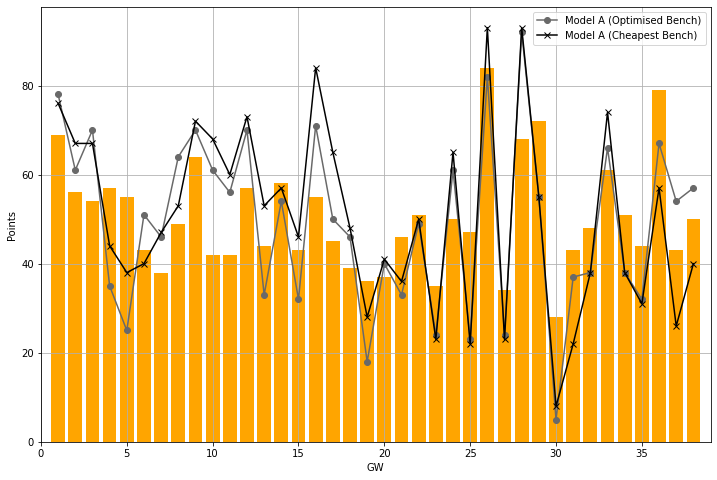

In [52]:
#avg gw points taken from fantasynutmeg.com
avg_gw = [69, 56, 54, 57, 55, 43, 38, 49, 64, 42, 42, 57, 44, 58, 43, 55, 45, 39, 36, 37, 46, 51, 35, 50, 47, 84,
          34, 68, 72, 28, 43, 48, 61, 51, 44, 79, 43,50]

plt.figure(figsize=(12, 8))
plt.bar(np.arange(1,39), avg_gw, color = 'orange')
plt.plot(np.arange(1,39), all_opt_df.total_points, 'dimgrey', marker = 'o', label = 'Model A (Optimised Bench)')
plt.plot(np.arange(1,39), all_cheap_df.total_points, 'black', marker = 'x', label = 'Model A (Cheapest Bench)')
plt.grid()
plt.xlabel('GW')
plt.ylabel('Points')
plt.xlim([0,39]);
plt.legend();

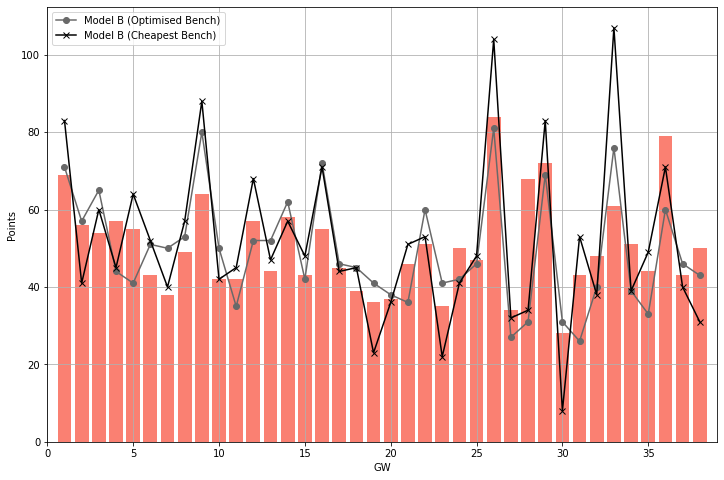

In [53]:
plt.figure(figsize=(12, 8))
plt.bar(np.arange(1,39), avg_gw, color = 'salmon')
plt.plot(np.arange(1,39), sep_opt_df.total_points, 'dimgrey', marker = 'o', label = 'Model B (Optimised Bench)')
plt.plot(np.arange(1,39), sep_cheap_df.total_points, 'black', marker = 'x', label = 'Model B (Cheapest Bench)')
plt.grid()
plt.xlabel('GW')
plt.ylabel('Points')
plt.xlim([0,39]);
plt.legend();

In [71]:
#just writing results to csv
all_opt_df.to_csv('model_a_optimal_transfers.csv')
all_cheap_df.to_csv('model_a_cheapest_transfers.csv')
sep_opt_df.to_csv('model_b_optimal_transfers.csv')
sep_cheap_df.to_csv('model_b_cheapest_transfers.csv')